<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Random Projection

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) 

Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, Applied Machine Learning in Python: a Hands-on Guide with Code, https://geostatsguy.github.io/MachineLearningDemos_Book. 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository (0.0.1). Zenodo. [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Random Projection**. 

**YouTube Lecture**: check out my lectures on:

* [Introduction to Machine Learning](https://youtu.be/zOUM_AnI1DQ?si=wzWdJ35qJ9n8O6Bl)
* [Curse of Dimensionality, Dimensionality Reduction, Principal Component Analysis](https://youtu.be/-to3JXiae9Y?si=W1j2CwR9t0t8hxIB)
* [Multidimensional Scaling and Random Projection](https://youtu.be/Yt0o8ukIOKU?si=_ri1NPwKVdhYzgO3)

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivation for Random Projection

Imagine we need very fast dimensionality reduction by a projection from $m$ features, i.e., high dimensional, to $p$ features, i.e., lower dimensional space,  

$$
𝑝, \quad \text{where} \quad 𝑝 << 𝑚
$$

and in this case,

* we do not have all the data now (for example, real-time data), so we cannot calculate a matrix of covariances nor dissimilarities

* we cannot afford to calculate an orthogonal transform, given the size of $m$ it is too computationally expensive

Can we transform the $m$ features to a lower dimensional $p$ with a random linear projection?

<figure style="text-align: center;">
  <img src="_static\random_projection\context.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;">The concept of random projection, vs. multidimensional scaling.</figcaption>
</figure>

where $𝑋_{1 \times m}$ is a single data sample over $m$ features, $𝑅_{p \times m}$ is a random projection matrix, populated with random values, and $𝑋_{p \times n}^{𝑅𝑃}$ is the new data projected to $p$ features. 

#### Random Projection

An alternative to principal components analysis and multidimensional scaling that relies on an random ($p \times n$) projection matrix, $𝑅_{p \times m}$.

* all values are independent, random variables, typically standard normal, $N\left[0,1\right]$. 

To avoid distortion, the projection $𝑅_{p \times m}$ should be orthogonal, but as said above, ensuring orthogonality is too computationally expensive, to understand how this can work, we need to understand,

* **Hercht-Neilsen (1994)** - the existence of a much larger number of orthogonal vectors in high dimensional space, likely quasi-orthogonal

* **Johnson-Lindenstrauss lemma (1984)** - that points in high-dimensional space can be linearly embedded in lower dimension with approximate preservation of pairwise distance with a high probability

#### Near-orthogonal Vectors in High Dimensional Space

Robert Hercht-Neilsen (1994) demonstrates that in high dimensional space, there exists a much larger number of almost orthogonal than strictly orthogonal directions.

* Random matrices may be sufficiently close to orthogonal in high dimensions.

$$
𝑅_{m×p}^𝑇 𝑅_{p×m} \approx 𝐼_{m×m}
$$
     
where $I$ is the identify matrix, $\approx$ indicates approximate equal to identity matrix.

Our random vectors will be close enough to orthogonal if the dimensionality is large enough, i.e., high dimensional space.

* the probability increases with increase in dimensionality, the number of features, $𝑚$

#### Probability of Near Preservation of Pairwise Distance in High Dimensional Space

This random approach works practically because of the The Johnson-Lindenstrauss lemma:

*In mathematics, the Johnson-Lindenstrauss lemma is a result concerning low-distortion embeddings of points from high-dimensional into low-dimensional Euclidean space. The lemma states that a small set of points in a high-dimensional space can be embedded into a space of much lower dimension in such a way that distances between the points are nearly preserved. The map used for the embedding is at least Lipschitz, and can even be taken to be an orthogonal projection.* - Wikipedia article.

Points in a high-dimensionality space can be linearly embedded in a space of much lower dimensionality in such a way that distances between the points are nearly preserved (we allow for error, 𝜀)

We can calculate given the size of data set, 𝑛, and desired error limit, 𝜀, the minimum number of dimensions, 𝑝, that we can project to with high probability of based on random projection, as a minimum,

$$
𝑝 > \frac{ln⁡(𝑛)}{𝜀^2} 
$$

For example, for 1,000 data with an pairwise distance error of 10% (0.1) we can project randomly to 690 dimensional.

* this minimum does not depend on the original dimensionality of the problem, $𝑚$!

#### Load the Required Libraries

The following code loads the required libraries. These should have been installed with Anaconda 3.

In [3]:
ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # ndarrays for gridded data
import pandas as pd                                           # DataFrames for tabular data
import os                                                     # set working directory, run executables
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator,AutoMinorLocator,NullLocator,FuncFormatter) # control of axes ticks
import matplotlib.patches as patches                          # add square to matrix plot
from scipy import stats                                       # summary statistics
import math                                                   # trigonometry etc.
import scipy.signal as signal                                 # kernel for moving window calculation
import random                                                 # for random numbers
import seaborn as sns                                         # for matrix scatter plots
from scipy import linalg                                      # for linear regression

from sklearn.random_projection import GaussianRandomProjection # random projection
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import SparseRandomProjection
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler              # standardize features
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map
seed = 42                                                     # random number seed 

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

Convenience functions to add commas to numbers and major and minor gridlines to plots.

In [5]:
def comma_format(x, pos):
    return f'{int(x):,}'
    
def add_grid():                                            
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks 

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [7]:
#os.chdir("c:/PGE383")                                        # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.  

In [9]:
#df = pd.read_csv('unconv_MV_v4.csv')                         # load our data table
df = pd.read_csv(r'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v4.csv')
df['TOC'] = np.where(df['TOC']<0.0, 0.0, df['TOC']) # set TOC < 0.0 as 0.0, otherwise leave the same

Visualizing the DataFrame would be useful and we already learned about these methods in this demo (https://git.io/fNgRW). 

We can preview the DataFrame by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). With the head command, add parameter 'n=13' to see the first 13 rows of the dataset.  

In [11]:
df.head(n=13)                                                 # we could also use this command for a table preview

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,1695.360819
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3007.096063
2,3,14.02,2.59,4.01,72.80,0.89,2.72,2531.938259
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5288.514854
4,5,17.52,4.57,3.18,10.94,1.51,1.90,2859.469624
5,6,14.53,4.81,2.69,53.60,0.94,1.67,4017.374438
6,7,13.49,3.60,2.93,63.71,0.80,1.85,2952.812773
7,8,11.58,3.03,3.25,53.00,0.69,1.93,2670.933846
8,9,12.52,2.72,2.43,65.77,0.95,1.98,2474.048178
9,10,13.25,3.94,3.71,66.20,1.14,2.65,2722.893266


This dataset has features from 200 unconventional wells including: 

0. well index
1. well average porosity (%) 
2. permeability (mD)
3. acoustic impedance (kg/m2s*10^6)
4. brittleness ratio (%) 
5. total organic carbon (%) 
6. vitrinite reflectance (%)
8. normalized initial production 90 day average (MCFPD). 

Note, the dataset is synthetic, but has realistic ranges and general multivariate relationships.

Ranking features is really an effort to understand the features and their relationships with each other.  We will start with basic data visualization and move to more complicated methods such are partial correlation and recursive feature elimination.

#### Summary Statistics

Let's check the summary statistics of our data.

In [13]:
df.describe().transpose()                                     # display summary statistics

,count,mean,std,min,25%,50%,75%,max
Well,200.0,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
Por,200.0,14.991150,2.971176,6.550000,12.912500,15.070000,17.402500,23.550000
Perm,200.0,4.330750,1.731014,1.130000,3.122500,4.035000,5.287500,9.870000
AI,200.0,2.968850,0.566885,1.280000,2.547500,2.955000,3.345000,4.630000
Brittle,200.0,48.161950,14.129455,10.940000,37.755000,49.510000,58.262500,84.330000
TOC,200.0,0.991950,0.478264,0.000000,0.617500,1.030000,1.350000,2.180000
VR,200.0,1.964300,0.300827,0.930000,1.770000,1.960000,2.142500,2.870000
Prod,200.0,3864.407081,1553.277558,839.822063,2686.227611,3604.303506,4752.637555,8590.384044


Summary statistics are a critical first step in data checking. 

* this includes the number of valid (non-null) values for each feature (count removes all np.NaN from the totals for each variable).

* we can see the general behaviors such as central tendency, mean, and dispersion, variance. 

* we can identify issue with negative values, extreme values, and values that are outside the range of plausible values for each property. 

* We can also establish the feature ranges for plotting.  We could calculate the feature range directly from the data with code like this:

```p
Pormin = np.min(df['Por'].values)          # extract ndarray of data table column
Pormax = np.max(df['Por'].values)          # and calculate min and max
```

but, this would not result in easy to understand color bars and axis scales, let's pick convenient round numbers. We will also declare feature labels for ease of plotting. 

In [15]:
pormin = 6.0; pormax = 24.0; porname = 'Porosity (%)'; portitle = 'Porosity'
permmin = 0.0; permmax = 10; permname = 'Permeability (mD)'; permtitle = 'Permeability'                
AImin = 1.0; AImax = 5.0; AIname = 'Acoustic Impedance (kg/m2s*10^6)'; AItitle = 'Acoustic Impedance'
brmin = 10.0; brmax = 85.0; brname = 'Brittleness Ratio (%)'; brtitle = 'Brittleness'
TOCmin = 0.0; TOCmax = 2.2; TOCname = 'Total Organic Carbon (%)'; TOCtitle = 'Total Organic Carbon' 
VRmin = 0.9; VRmax = 2.9; VRname = 'Vitrinite Reflectance (%)'; VRtitle = 'Vitrinite Reflectance'
prodmin = 500.0; prodmax = 9000.0; prodname = 'Normalized Initial Production (MCFPD)'; prodtitle = 'Normalized Initial Production'

The data looks to be in pretty good shape and for brevity we skip outlier detection. Let's look at the distributions with a matrix scatter plot from the Seaborn package.

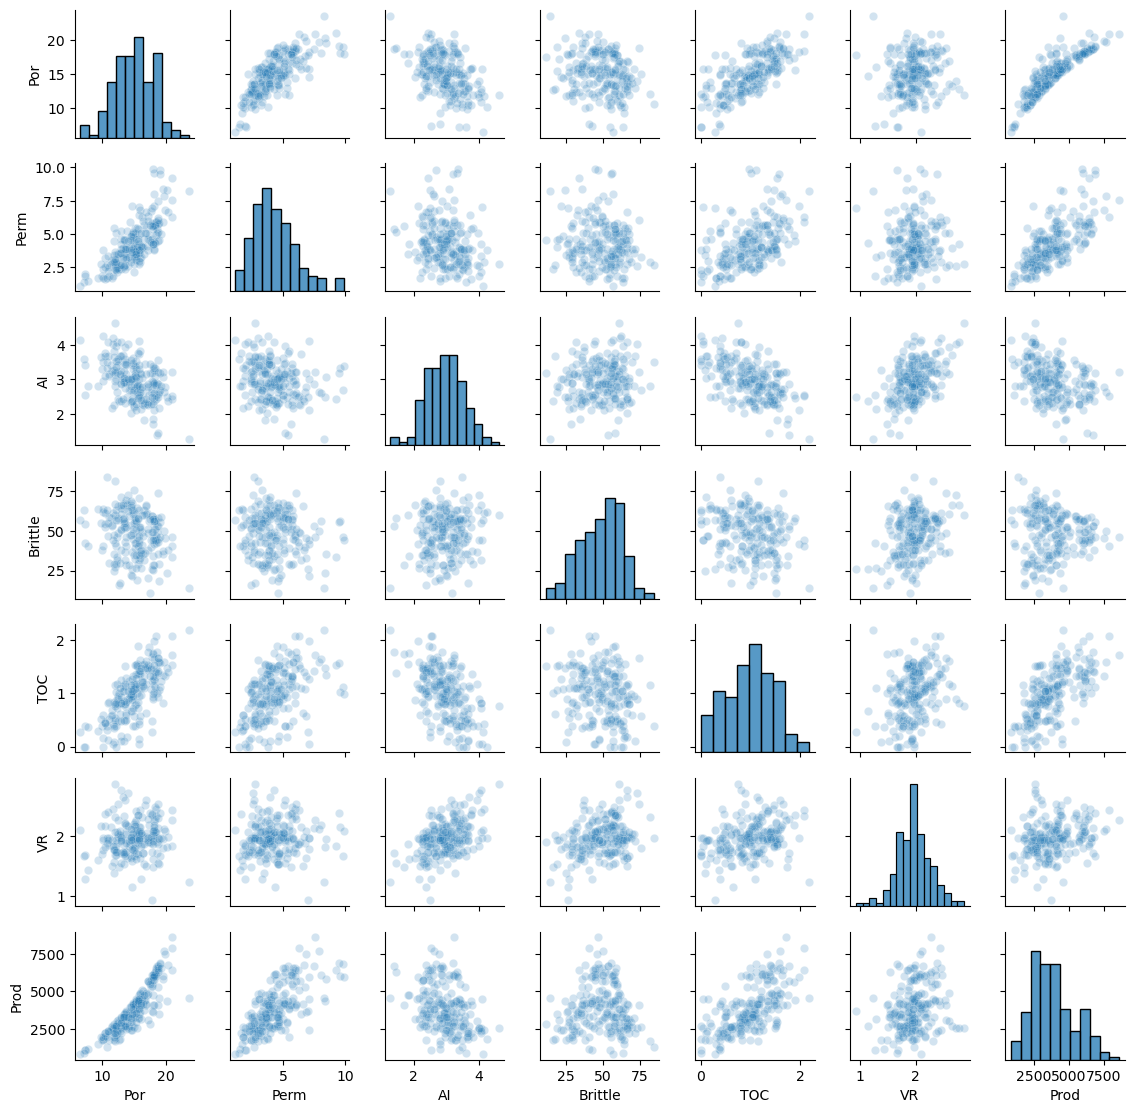

In [17]:
sns.pairplot(df,vars=['Por','Perm','AI','Brittle','TOC','VR','Prod'],markers='o',plot_kws={'alpha': 0.2})
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.6, top=0.6, wspace=0.3, hspace=0.2); plt.show()

#### Feature Standardization

Since our model works with dissimilarity (analogous to distance in feature space) measures, we need to standardize the features. 

In [19]:
features = ['Por','Perm','AI','Brittle','TOC','VR']
x = df.loc[:,features].values
mu = np.mean(x, axis=0)
sd = np.std(x, axis=0)
xs = StandardScaler().fit_transform(x)

ns_features = []
for i in range(0,len(features)):
    df['NS_'+features[i]] = xs[:,i]
    ns_features.append('NS_'+features[i]) 

df.head(n=13)

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod,NS_Por,NS_Perm,NS_AI,NS_Brittle,NS_TOC,NS_VR
0,1,12.08,2.92,2.80,81.40,1.16,2.31,1695.360819,-0.982256,-0.817030,-0.298603,2.358297,0.352257,1.152048
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3007.096063,-0.881032,-0.463751,0.444147,-0.141332,-0.213702,-0.280931
2,3,14.02,2.59,4.01,72.80,0.89,2.72,2531.938259,-0.327677,-1.008148,1.841224,1.748113,-0.213702,2.518377
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5288.514854,0.903875,1.401098,-0.599240,-0.592585,0.184565,-0.280931
4,5,17.52,4.57,3.18,10.94,1.51,1.90,2859.469624,0.853263,0.138561,0.373409,-2.640962,1.085907,-0.214280
5,6,14.53,4.81,2.69,53.60,0.94,1.67,4017.374438,-0.155597,0.277556,-0.493133,0.385839,-0.108895,-0.980758
6,7,13.49,3.60,2.93,63.71,0.80,1.85,2952.812773,-0.506505,-0.423211,-0.068704,1.103161,-0.402355,-0.380906
7,8,11.58,3.03,3.25,53.00,0.69,1.93,2670.933846,-1.150962,-0.753324,0.497200,0.343268,-0.632930,-0.114305
8,9,12.52,2.72,2.43,65.77,0.95,1.98,2474.048178,-0.833795,-0.932859,-0.952930,1.249322,-0.087933,0.052320
9,10,13.25,3.94,3.71,66.20,1.14,2.65,2722.893266,-0.587484,-0.226301,1.310688,1.279831,0.310334,2.285102


#### Data Preparation 

Let's make an ordinal feature from the continuous production:

1. low
2. medium
3. high
4. very high 

production rates.  This will help us visualize the results as we proceed, we can look at wells with different levels of production projected into a variety of lower dimensional spaces with multidimensional scaling.

In [21]:
bins = [0,2500,5000,7500,10000]                # assign the production bins (these are the fence posts)
labels = ['low', 'med', 'high', 'vhigh']       # assign the labels
category = pd.cut(df['Prod'],bins,labels=labels)     # make the 1D array with the labels for our data
df['tProd'] = category                                # add the new ordinal production feature to our DataFrames    
df.head()
dpalette = sns.color_palette("rocket_r",n_colors = 4)
palette = sns.color_palette("rocket")

Let's take a look at the matrix scatter plot of our 3 features and the production levels.

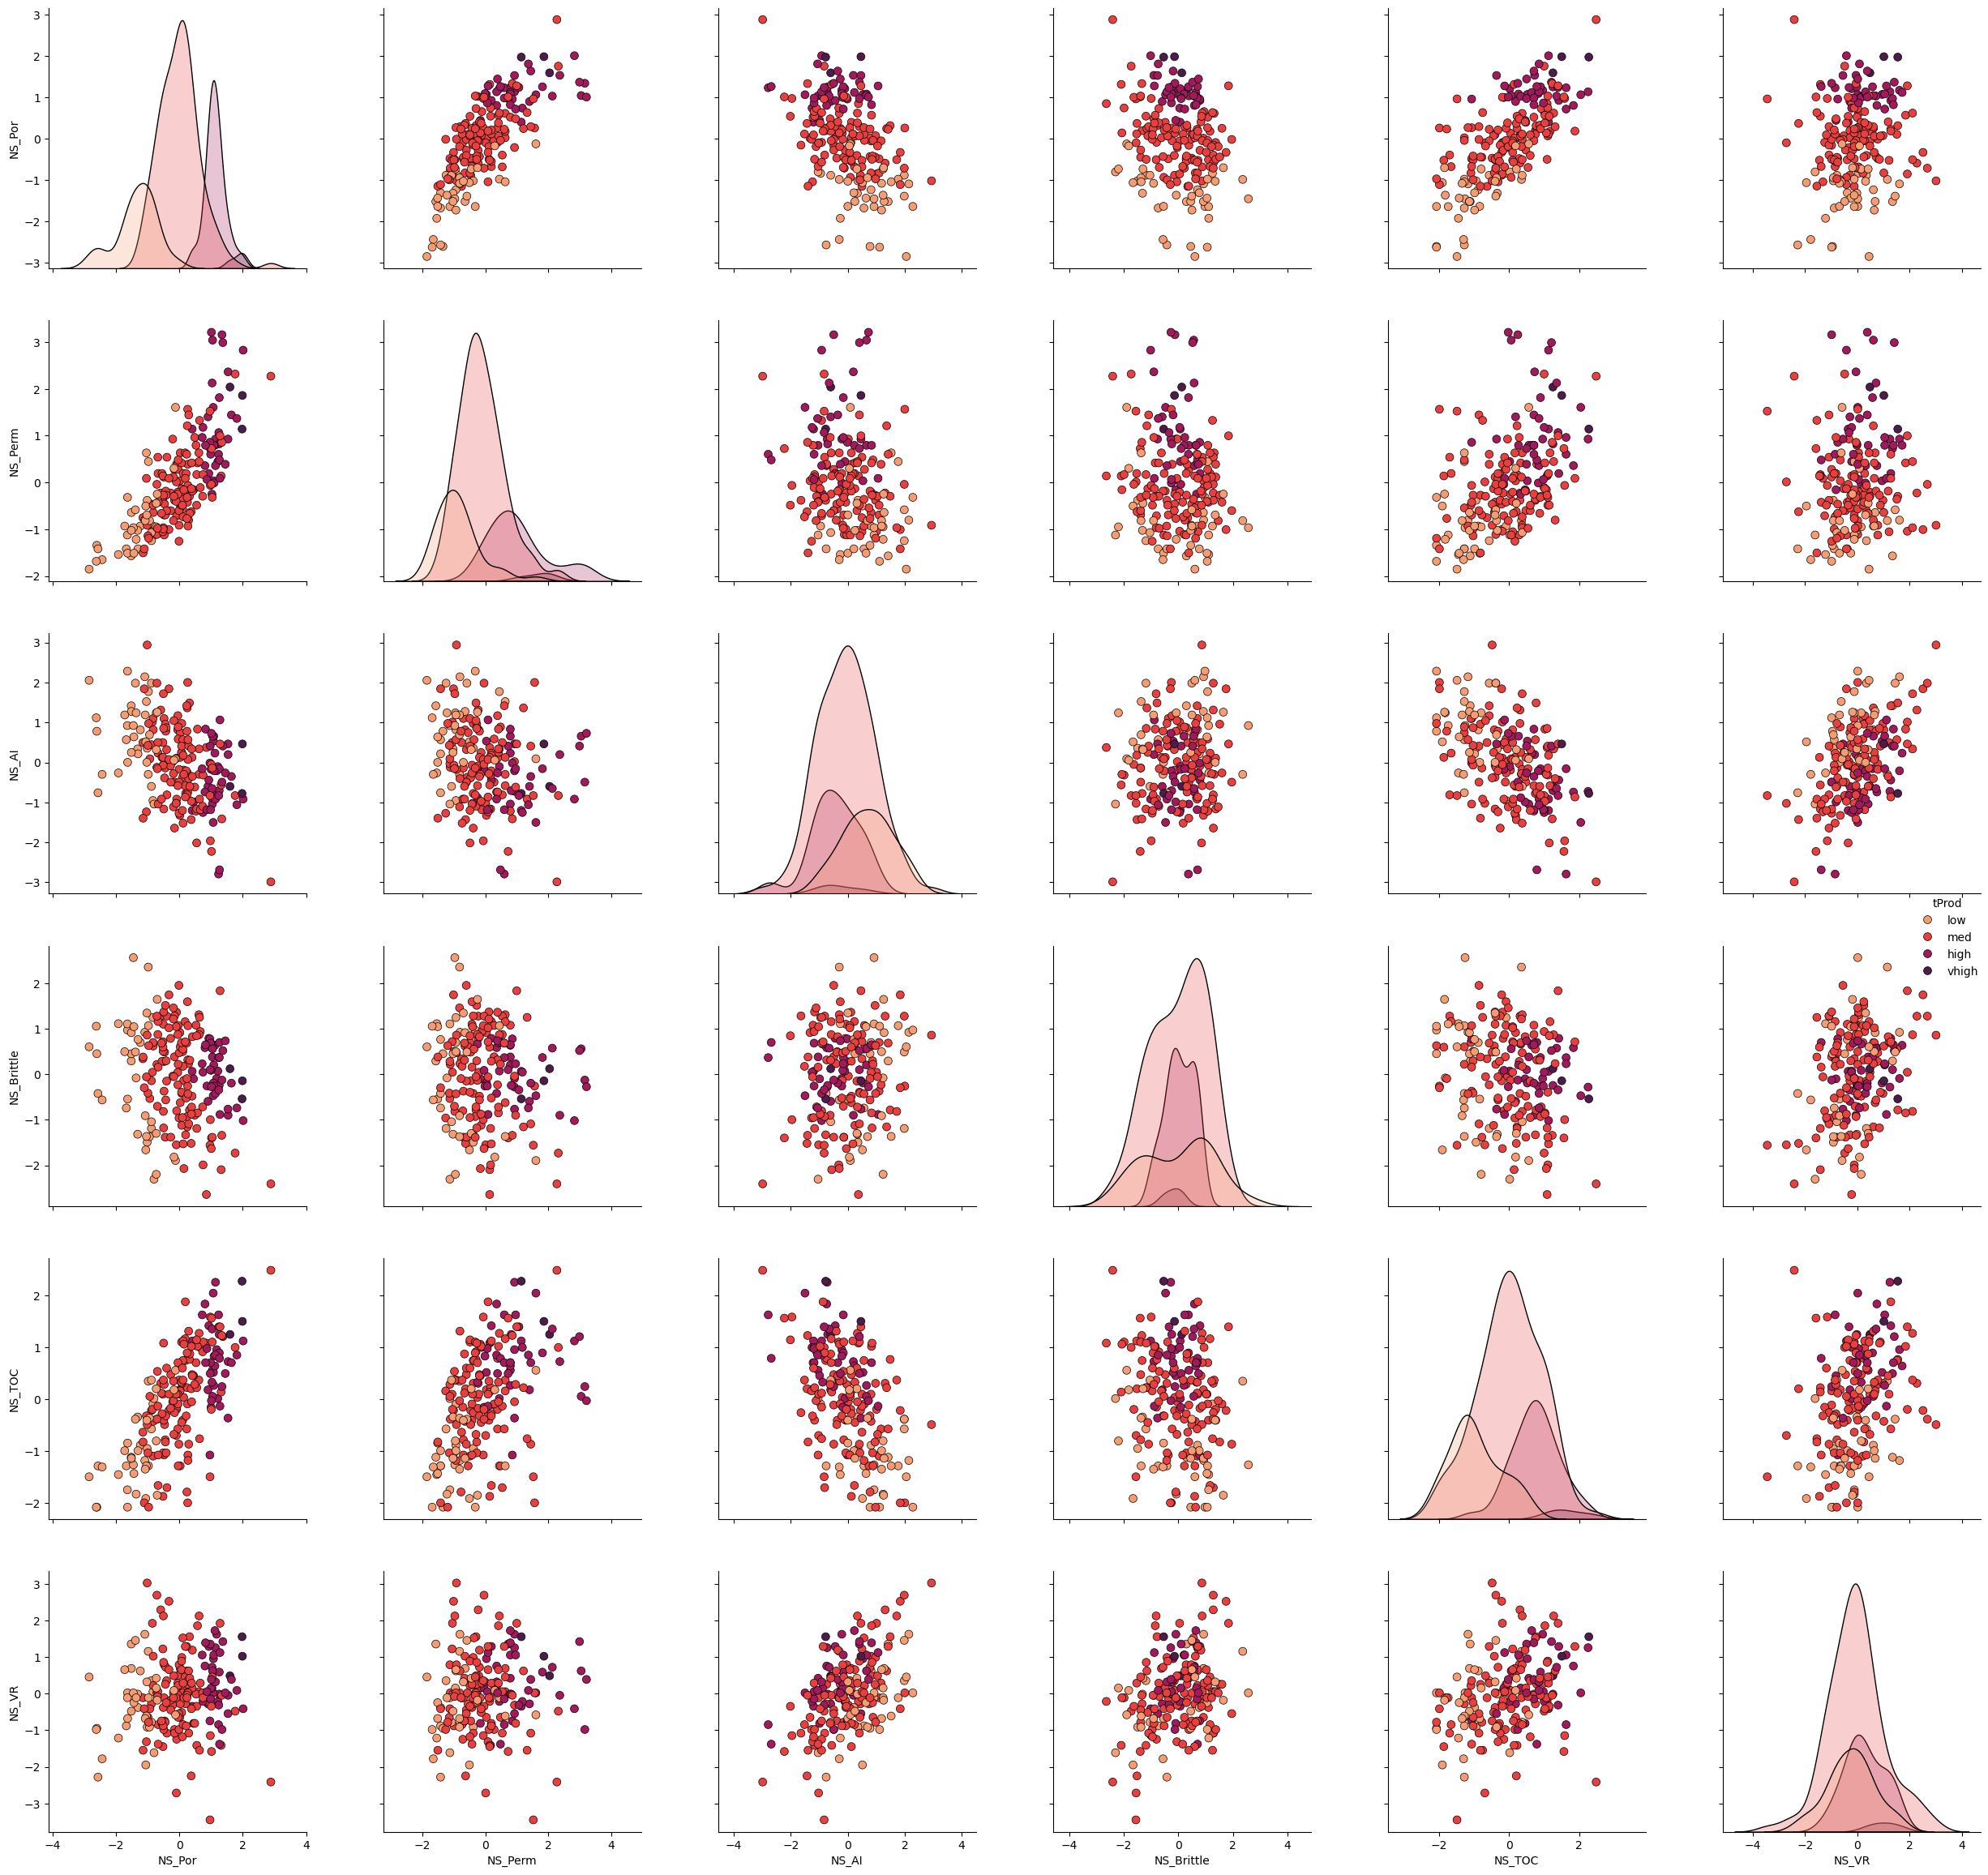

In [23]:
plot = sns.pairplot(df[ns_features + ['tProd']],markers='o',hue = 'tProd', palette = dpalette,diag_kws={'edgecolor':'black'},plot_kws=dict(s=50, edgecolor="black", linewidth=0.5))

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.5, wspace=0.3, hspace=0.2)
plt.show()

#### Random Projection

Let's demonstrate the use of random projection.

* given the low dimensionality you will see quite poor performance for some random seeds

Distance Ratio, mean: 0.83, standard deviation 0.16.


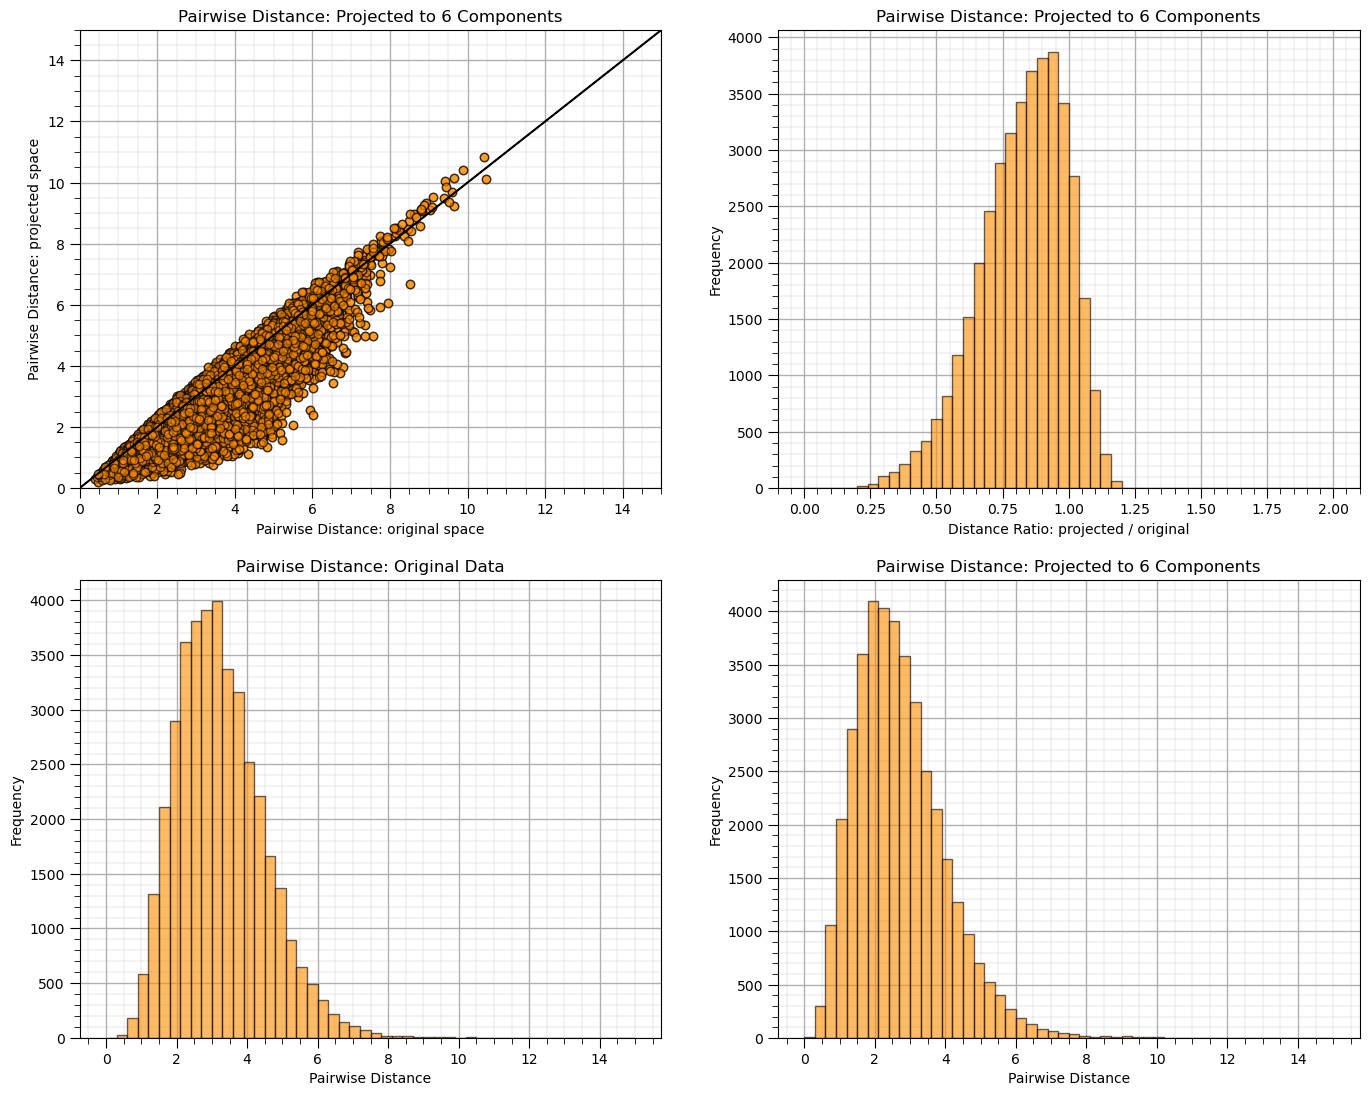

In [25]:
n_components = 6; seed = 73058
rp = GaussianRandomProjection(n_components=n_components,random_state = seed)

dists = euclidean_distances(df[ns_features], squared=False).ravel()
nonzero = dists != 0   # select only non-identical samples pairs
dists = dists[nonzero]

projected_data = rp.fit_transform(df[ns_features])
projected_dists = euclidean_distances(projected_data, squared=False).ravel()[nonzero]

plt.subplot(221)
plt.scatter(dists,projected_dists,c='darkorange',alpha=0.6,edgecolor = 'black')
plt.arrow(0,0,200,200,width=0.02,color='black',head_length=0.0,head_width=0.0)
plt.xlim(0,15); plt.ylim(0,15); add_grid()
plt.xlabel("Pairwise Distance: original space"); plt.ylabel("Pairwise Distance: projected space")
plt.title("Pairwise Distance: Projected to %d Components" % n_components)

rates = projected_dists / dists
print("Distance Ratio, mean: %0.2f, standard deviation %0.2f." % (np.mean(rates), np.std(rates)))

plt.subplot(222)
plt.hist(rates, bins=50, range=(0., 2.),color = 'darkorange', alpha = 0.6, edgecolor='k')
plt.xlabel("Distance Ratio: projected / original"); plt.ylabel("Frequency"); add_grid()
plt.title("Pairwise Distance: Projected to %d Components" % n_components)

plt.subplot(223)
plt.hist(dists, bins=50, range=(0., 15.),color = 'darkorange', alpha = 0.6, edgecolor='k')
plt.xlabel("Pairwise Distance"); plt.ylabel("Frequency"); add_grid()
plt.title("Pairwise Distance: Original Data")

plt.subplot(224)
plt.hist(projected_dists, bins=50, range=(0., 15.),color = 'darkorange', alpha = 0.6, edgecolor='k')
plt.xlabel("Pairwise Distance"); plt.ylabel("Frequency"); add_grid()
plt.title("Pairwise Distance: Projected to %d Components" % n_components)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.2, hspace=0.2); plt.show()

Check the orthogonality of the random projection matrix.

* by calculating and displaying $R_p^T R_p$, if orthogonal it should be a strictly diagonal matrix

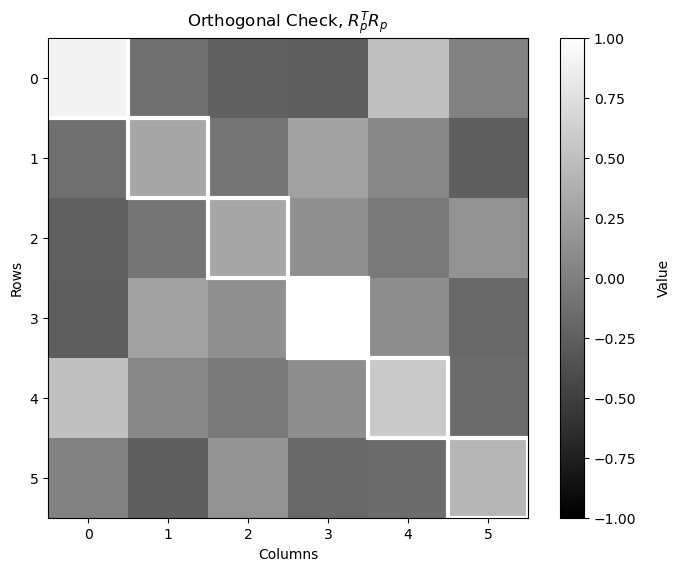

In [27]:
orthogonal_check = np.dot(rp.components_.T, rp.components_)

fig, ax = plt.subplots()
cax = ax.imshow(orthogonal_check,cmap=plt.cm.grey,vmin=-1,vmax=1.0,interpolation='None',zorder=1)
#cbar = plt.colorbar(); cbar.set_label('Value')

matrix_size = orthogonal_check.shape[0]  # Assuming the matrix is square (m x m)
square_size = 1  # Each square has size 1x1

for i in range(matrix_size):
    # Add a square around each diagonal element
    square = patches.Rectangle((i - 0.5, i - 0.5),square_size,square_size,linewidth=3, edgecolor='white', facecolor='none')
    ax.add_patch(square)

# Add a colorbar
cbar = fig.colorbar(cax)
cbar.set_label('Value', rotation=90, labelpad=15)  # Set label for colorbar

plt.title(r'Orthogonal Check, $R_p^T R_p$')
plt.xlabel('Columns'); plt.ylabel('Rows')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.3); plt.show()

#### Add More Features

We are seeing that for m = 6 we are not seeing significant dimensionality reduction. Let's instantiate a larger model.

* set $m$ as large, i.e., $m \ge 100$

* set $p$ as a reasonable ratio of $m$, for example $\frac{2}{3}$ up to $\frac{1}{2}$

Since we don't have access to a arbitrarily large data set, let's generate it randomly.

* standard normal, high dimensional multiGaussian distribution with all means of 0 and variances of 1.0

* random correlations between the features

* we use eigendecomposition, set the negative or zero eigenvalues to small positive to ensure the correlation matrix is positive semi-definite 

In [78]:
m = 100                                                       # number of dimensions
n_samples = 1000                                              # number of samples

np.random.seed(seed = seed)                                   # set the random seed
mean_vector = np.zeros(m)                                     # mean vector (zero mean for all variables)

random_matrix = np.random.rand(m, m)                          # step 1: generate a random matrix 
correlation_matrix = np.dot(random_matrix, random_matrix.T)   # step 2: create a symmetric correlation matrix
correlation_matrix = (correlation_matrix + correlation_matrix.T) / 2 # step 3: symmetrize the correlation matrix (ensures the matrix is symmetric)
np.fill_diagonal(correlation_matrix, 1)                       # step 4: normalize to have ones on the diagonal (this ensures unit variances)

# Ensure the covariance matrix is positive semi-definite using eigendecomposition
eigvals, eigvecs = np.linalg.eigh(correlation_matrix)         # eigendecomposition of the correlation matrix
eigvals = np.maximum(eigvals, 1e-6)                           # set any negative eigenvalues to a small positive value
cov_matrix = eigvecs @ np.diag(eigvals) @ eigvecs.T           # reconstruct the covariance matrix

big_data = np.random.multivariate_normal(mean_vector, cov_matrix, size=n_samples) # step 6: generate the multi-dimensional Gaussian dataset
df_big_data = pd.DataFrame(big_data, columns=[f"Dim_{i+1}" for i in range(m)]) # convert the data into a pandas DataFrame

This data is too high dimensional to conveniently visualize, let's proceed with random projection.

Distance Ratio, mean: 0.95, standard deviation 0.02.


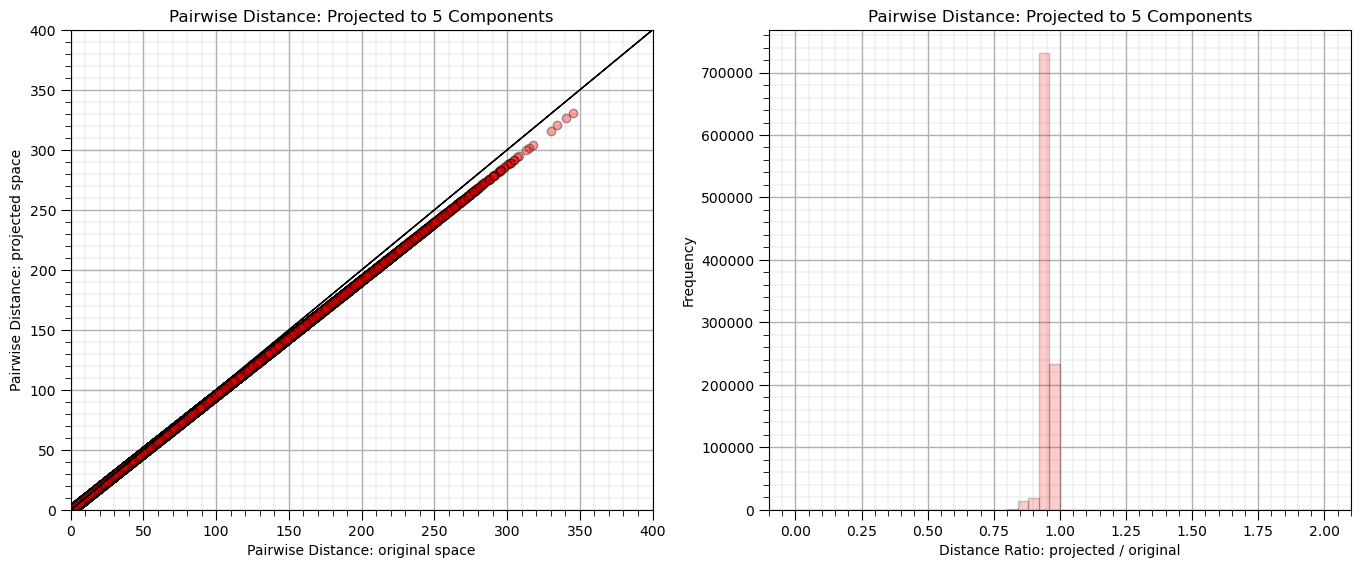

In [81]:
n_components = 5; seed = 73058
rp_big = GaussianRandomProjection(n_components=n_components,random_state = seed)

dists = euclidean_distances(df_big_data, squared=False).ravel()
nonzero = dists != 0   # select only non-identical samples pairs
dists = dists[nonzero]

projected_data = rp_big.fit_transform(df_big_data)
projected_dists = euclidean_distances(projected_data, squared=False).ravel()[nonzero]

plt.subplot(121)
plt.scatter(dists,projected_dists,c='red',alpha=0.2,edgecolor = 'black')
plt.arrow(0,0,10000,10000,width=0.02,color='black',head_length=0.0,head_width=0.0)
plt.xlabel("Pairwise Distance: original space")
plt.ylabel("Pairwise Distance: projected space")
plt.title("Pairwise Distance: Projected to %d Components" % n_components)
plt.xlim([0,400]); plt.ylim([0,400]); add_grid()

rates = projected_dists / dists
print("Distance Ratio, mean: %0.2f, standard deviation %0.2f." % (np.mean(rates), np.std(rates)))

plt.subplot(122)
plt.hist(rates, bins=50, range=(0., 2.),color = 'red', alpha = 0.2, edgecolor='k')
plt.xlabel("Distance Ratio: projected / original"); plt.ylabel("Frequency"); add_grid()
plt.title("Pairwise Distance: Projected to %d Components" % n_components)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.3); plt.show()

Check the orthogonality of the random projection matrix.

* by calculating and displaying $R_p^T R_p$, if orthogonal it should be a strictly diagonal matrix

Note, $R_p$ is not square, it is $p \times m$, so we are actually checking column orthogonality, $R_p^T R_p$

* we are checking is the reduced dimensional projects forms an orthogonal basis

* from above $R_p^T$ is $m \times p$ and $R_p$ is $p \times m$ so $R_p^T R_p$ is $m \times m$

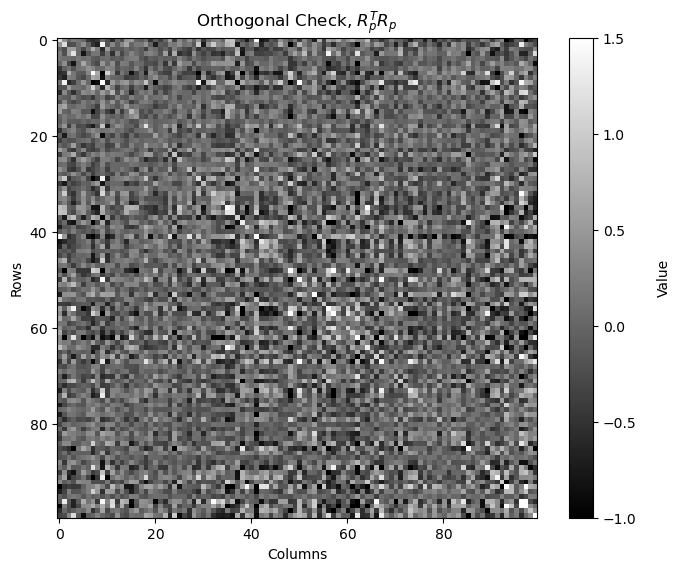

In [83]:
orthogonal_check_big = np.dot(rp_big.components_.T, rp_big.components_)
fig, ax = plt.subplots()
cax = ax.imshow(orthogonal_check_big,cmap=plt.cm.grey,vmin=-1,vmax=1.5,interpolation='None',zorder=1)

matrix_size = orthogonal_check.shape[0]                       # assuming the matrix is square (m x m)
square_size = 1                                               # each square has size 1x1

cbar = fig.colorbar(cax); cbar.set_label('Value', rotation=90, labelpad=15) 

plt.title(r'Orthogonal Check, $R_p^T R_p$'); plt.xlabel('Columns'); plt.ylabel('Rows')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.3); plt.show()

#### Add Even More Features

Let's try a larger dimensionality with a single code block.

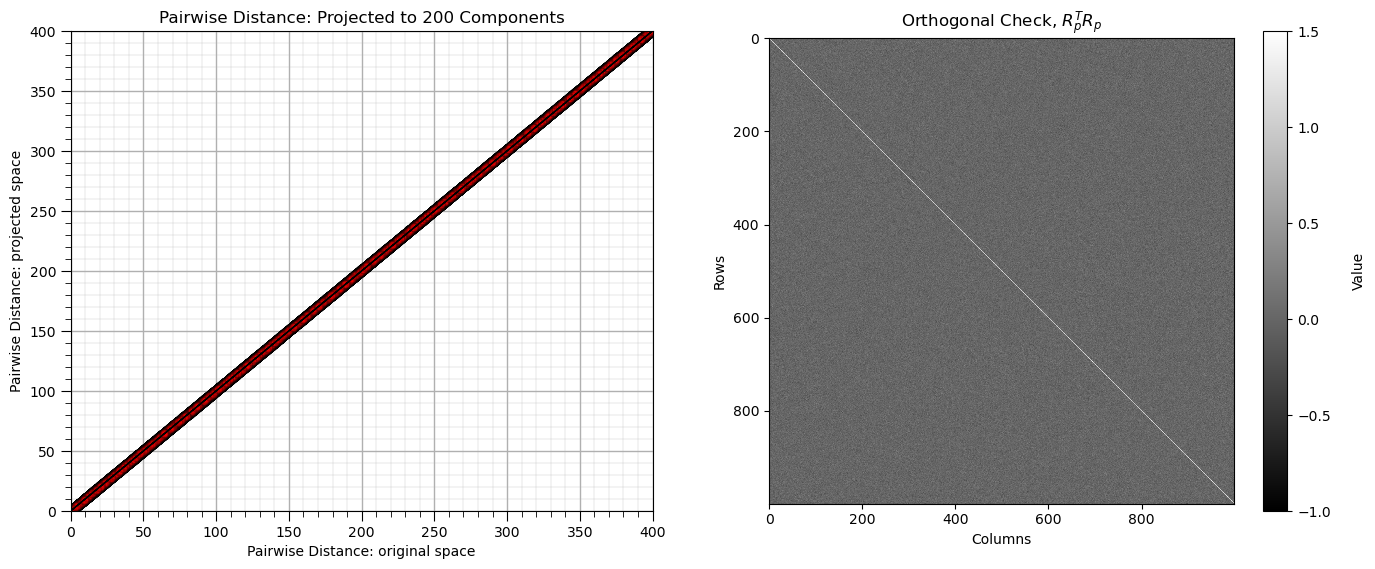

In [87]:
m = 1000                                                      # number of dimensions
n_samples = 1000                                              # number of samples
n_components = 200                                            # number of components 
seed = 73058                                                  # random seed

np.random.seed(seed = seed)                                   # set the random seed
mean_vector = np.zeros(m)                                     # mean vector (zero mean for all variables)

random_matrix = np.random.rand(m, m)                          # step 1: generate a random matrix 
correlation_matrix = np.dot(random_matrix, random_matrix.T)   # step 2: create a symmetric correlation matrix
correlation_matrix = (correlation_matrix + correlation_matrix.T) / 2 # step 3: symmetrize the correlation matrix (ensures the matrix is symmetric)
np.fill_diagonal(correlation_matrix, 1)                       # step 4: normalize to have ones on the diagonal (this ensures unit variances)

# Ensure the covariance matrix is positive semi-definite using eigendecomposition
eigvals, eigvecs = np.linalg.eigh(correlation_matrix)         # eigendecomposition of the correlation matrix
eigvals = np.maximum(eigvals, 1e-6)                           # set any negative eigenvalues to a small positive value
cov_matrix = eigvecs @ np.diag(eigvals) @ eigvecs.T           # reconstruct the covariance matrix

very_big_data = np.random.multivariate_normal(mean_vector, cov_matrix, size=n_samples) # step 6: generate the multi-dimensional Gaussian dataset
df_very_big_data = pd.DataFrame(very_big_data, columns=[f"Dim_{i+1}" for i in range(m)]) # convert the data into a pandas DataFrame

rp_very_big = GaussianRandomProjection(n_components=n_components,random_state = seed)

dists = euclidean_distances(df_very_big_data, squared=False).ravel()
nonzero = dists != 0                                          # select only non-identical samples pairs
dists = dists[nonzero]

projected_data = rp_very_big.fit_transform(df_very_big_data)
projected_dists = euclidean_distances(projected_data, squared=False).ravel()[nonzero]

plt.subplot(121)
plt.scatter(dists,projected_dists,c='red',alpha=0.2,edgecolor = 'black')
plt.arrow(0,0,10000,10000,width=0.02,color='black',head_length=0.0,head_width=0.0)
plt.xlabel("Pairwise Distance: original space")
plt.ylabel("Pairwise Distance: projected space")
plt.title("Pairwise Distance: Projected to %d Components" % n_components)
plt.xlim([0,400]); plt.ylim([0,400]); add_grid()

orthogonal_check_very_big = np.dot(rp_very_big.components_.T, rp_very_big.components_)

plt.subplot(122)
im = plt.imshow(orthogonal_check_very_big,cmap=plt.cm.grey,vmin=-1,vmax=1.5,interpolation='None',zorder=1)
matrix_size = orthogonal_check.shape[0]                       # assuming the matrix is square (m x m)
square_size = 1                                               # each square has size 1x1
cbar = fig.colorbar(im); cbar.set_label('Value', rotation=90, labelpad=15) 
plt.title(r'Orthogonal Check, $R_p^T R_p$'); plt.xlabel('Columns'); plt.ylabel('Rows')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.3); plt.show()

#### Comments

This was a basic treatment of random projection. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources) and the YouTube lecture links at the start of this chapter with resource links in the videos' descriptions.

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) 
